This file is used to test the submission using data from [https://elicit.ought.org/builder?q_id=3864](https://elicit.ought.org/builder?q_id=3864)



In [1]:
%load_ext autoreload
%autoreload 2
from ergo import HistogramDist, TruncatedLogisticMixture, LogisticMixture

from ergo.conditions import (
    HistogramCondition,
    IntervalCondition,
    MaxEntropyCondition,
    CrossEntropyCondition,
    SmoothnessCondition,
)
from ergo.scale import Scale
import pickle

In [1]:
(xs, densities, scale) = pickle.load( open( "hist4log.p", "rb" ) )
conditions = [HistogramCondition(xs, densities)]

In [1]:
dx = LogisticMixture.from_conditions(
     conditions,
     fixed_params={"num_components": 3, "floor": scale.scale_min, "ceiling": scale.scale_max},
     scale=scale,
     verbose=True,
     init_tries=100,
     opt_tries=2,
     jit_all=True
 )

In [1]:
dxt = TruncatedLogisticMixture.from_conditions(
     conditions,
     fixed_params={"num_components": 3, "floor": scale.scale_min, "ceiling": scale.scale_max},
     scale=scale,
     verbose=True,
     init_tries=100,
     opt_tries=2,
     jit_all=True
 )

# Is the histogram being passed in good?



Yes it is



In [1]:
from plotnine import *
import pandas as pd
import numpy as np
df = pd.DataFrame(data= {"xs":xs, "densities" : densities})
df['true_scale'] = np.array(xs) * 25

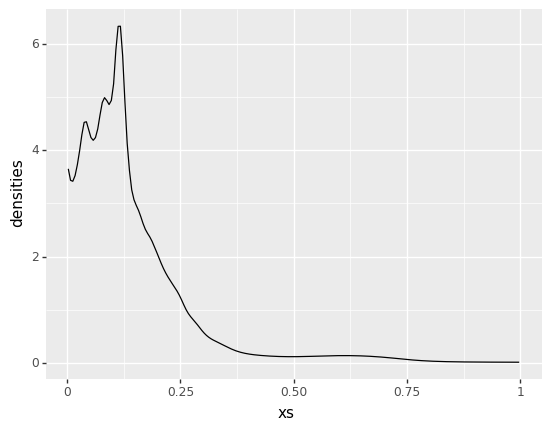

In [1]:
(ggplot(df, aes('xs', 'densities'))
+ geom_line()
)

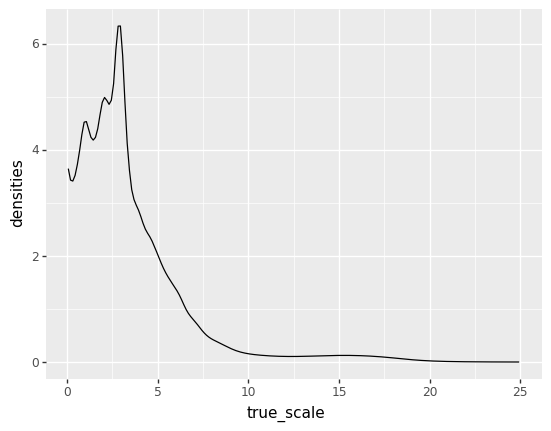

In [1]:
(ggplot(df, aes('true_scale', 'densities'))
+ geom_line()
)